In [2]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np
from statistics import stdev
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import itertools

In [8]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Creating features from audio files

In [16]:
header = 'filename rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [17]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [18]:
Instruments = 'flu pia tru org gac voi cel cla gel sax vio'.split()

for i in Instruments:
    for filename in os.listdir(f'./../IRMAS/IRMAS-TrainingData/{i}'):
        songname = f'./../IRMAS/IRMAS-TrainingData/{i}/{filename}'
        y, sr = librosa.load(songname, sr =44100)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {i}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [19]:
df = pd.read_csv('data.csv')
df.head()

,filename,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,[flu][cla]0441__1.wav,0.149752,2097.888099,2489.946539,3917.463313,0.044588,-183.342606,150.484238,-45.797676,31.572205,...,12.865310,5.979919,-0.760616,-2.864177,-10.078252,-9.153670,-5.919430,1.270639,-5.099973,flu
1,[flu][pop_roc]0372__1.wav,0.070092,1788.342987,3053.350599,3598.705395,0.024457,-266.117035,168.074860,8.713345,38.584534,...,0.733319,-3.077334,-3.865694,-7.703886,-7.980325,-0.265409,-0.590245,2.773574,-1.158271,flu
2,[flu][pop_roc]0489__3.wav,0.075266,1415.090142,1338.522972,2574.007601,0.044043,-260.943909,235.551620,-72.608337,1.650667,...,-4.480639,-4.898223,1.072633,8.016642,8.928833,3.030757,-6.311554,-13.654664,-10.805024,flu
3,061__[flu][dru][pop_roc]0419__2.wav,0.157308,1457.059728,2070.808325,2434.665329,0.035720,-223.190750,188.077667,-17.081148,22.657728,...,11.541116,8.014239,-9.074387,-9.779533,-8.943732,-7.005507,-2.292251,-2.062893,1.445740,flu
4,[flu][cla]0373__1.wav,0.048835,1903.336677,2381.898288,2342.879012,0.047959,-469.845367,92.393463,-23.503510,-9.021843,...,-23.929064,-29.581631,-23.973606,11.314720,24.038225,16.351347,-0.176797,-3.863950,-2.982665,flu


In [20]:
features = df[df.columns[2:26]]

# PCA Analysis

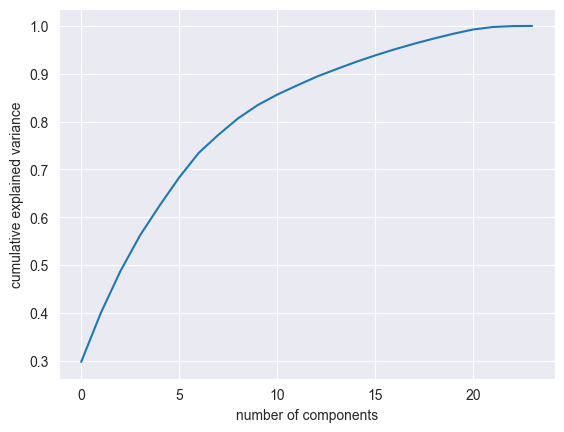

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
X = scale(features)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
# Dropping unnecessary columns
df = df.drop(['filename'],axis=1)
df1 = shuffle(df)
df1

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
6652,0.071709,1961.209176,2507.507859,3957.869246,0.041988,-229.035828,164.845016,-34.194000,35.699261,-2.849986,...,-11.165567,-7.875116,-2.443629,0.895404,1.686223,3.395577,3.221413,6.261742,7.190294,vio
3927,0.029132,1899.724645,2411.253007,3474.910262,0.056582,-300.150360,190.061386,-47.997978,30.289759,-14.314726,...,3.778373,-6.699133,-3.958761,-8.416626,-8.656926,0.123080,-1.381211,7.946159,-8.527723,cel
88,0.103502,3175.347872,3564.125048,7008.932908,0.072859,-155.406555,138.113464,-45.276642,50.041897,-22.781807,...,4.702804,-2.256299,-0.033783,1.299069,-11.996135,-0.693773,-7.549119,14.855676,-0.669368,flu
4542,0.039719,1474.099670,1719.897392,2195.721601,0.043548,-417.232880,168.885971,-49.676899,-21.656080,-4.344791,...,4.555777,-13.474098,-23.819942,-16.869604,-6.782542,11.717200,22.925726,19.739784,13.048459,cla
1452,0.011454,1081.469065,1351.486428,1414.789643,0.051386,-550.353271,210.321182,-0.414628,-1.803042,17.200771,...,5.925287,12.889028,18.893488,10.007546,-7.070832,-13.415367,-8.716270,-0.298097,3.847950,tru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,0.077030,3512.149374,3505.503256,6773.813609,0.107550,-180.053711,115.280907,-49.677650,47.533150,-8.868715,...,5.716197,-1.748456,7.072738,1.191650,0.057952,-5.572100,0.116684,-0.851783,-2.251374,vio
1096,0.060263,1041.268878,1429.800661,1647.497889,0.032211,-321.179291,225.773880,-7.042087,-4.422381,6.421009,...,-1.056134,-4.702707,-4.887537,-3.871208,-5.337322,-3.722355,-0.265363,2.587889,3.883764,pia
3404,0.164000,2379.403562,2897.337261,4997.033361,0.050953,-168.591431,156.109558,-31.985193,40.395473,-12.677487,...,12.262079,10.564720,2.074386,-0.986307,5.395571,0.764436,1.260478,8.408209,-1.202484,voi
5161,0.124297,1640.533355,2474.820303,3133.870883,0.030503,-216.174240,190.142136,-5.005192,18.513382,10.152429,...,-7.569409,-2.821613,-2.445399,1.186705,-3.892864,1.458047,-0.889800,-1.715195,-4.466225,gel


In [23]:
instru_list = df1.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [24]:
y

array([ 9,  0,  2, ..., 10,  4,  4])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM

In [26]:
svclassifier = SVC(kernel='rbf', C = 10.0, gamma=0.1)
svclassifier.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1)

## Save the Model


In [37]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svclassifier, file)
    
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
    
# Save the mapping (label encoder) for use in the software
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_train, y_train)
print("Validation score: {0:.2f} %".format(100 * score))


Validation score: 99.76 %


## Analyze model performance

In [28]:
# predicted_labels = svclassifier.predict(X_test)
Ypredict = pickle_model.predict(X_test)

In [36]:
print("Recall: ", recall_score(y_test, Ypredict,average=None))
print("Precision: ", precision_score(y_test, Ypredict,average=None))
print("F1-Score: ", f1_score(y_test, Ypredict, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, Ypredict,normalize=True), accuracy_score(y_test, Ypredict,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, Ypredict))

Recall:  [0.73076923 0.7254902  0.53535354 0.77669903 0.73943662 0.75177305
 0.70714286 0.59859155 0.69369369 0.592      0.74050633]
Precision:  [0.7125     0.60655738 0.62352941 0.6504065  0.70469799 0.76258993
 0.71223022 0.68548387 0.69369369 0.65486726 0.75      ]
F1-Score:  [0.72151899 0.66071429 0.57608696 0.7079646  0.72164948 0.75714286
 0.70967742 0.63909774 0.69369369 0.62184874 0.74522293]
Accuracy: 0.69  , 927.0
Number of samples: 1341
[[ 57   2   4   2   2   0   1   3   0   6   1]
 [  1  74   5   1   2   2   2   4   6   5   0]
 [  6   6  53   2   2   6  10   0   5   5   4]
 [  3   4   2  80   1   1   4   1   1   4   2]
 [  0   4   3   4 105   2   2   7   3   6   6]
 [  4   2   4   6   5 106   4   1   2   0   7]
 [  1   3   7  10   4   6  99   4   1   1   4]
 [  0   9   3   6   5   5   7  85   8   6   8]
 [  0  10   2   3   4   2   2   6  77   3   2]
 [  8   6   2   3   8   2   3   9   5  74   5]
 [  0   2   0   6  11   7   5   4   3   3 117]]


## Confusion Matrix Visualization

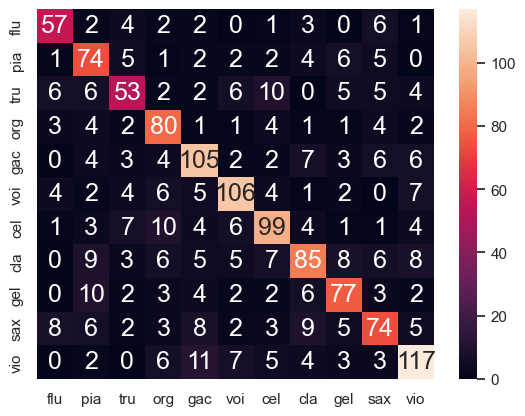

In [30]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, Ypredict),index=["flu", "pia", "tru", "org", "gac", "voi", "cel", "cla", "gel", "sax", "vio"], columns=["flu", "pia", "tru", "org", "gac", "voi", "cel", "cla", "gel", "sax", "vio"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()